# Playground

## Test 2D Wavelet Decomposition function
This function(fwdHaarDWT2D) computes the 2D Wavelet Transform in the image. All the input images are passed through a Haar Wavelet Decomposition module, to get the LL, LH, HL and HHH component of the image.

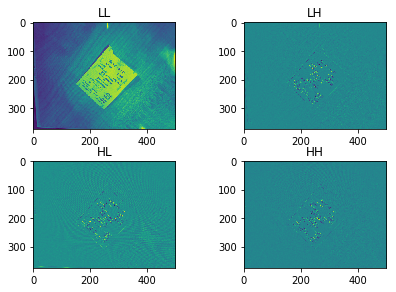

In [19]:
from PIL import Image
from matplotlib import pyplot as plt
from haar2D import fwdHaarDWT2D

img = Image.open('./positiveImages/350_letterbox1024.jpg').convert('L')
img = img.transpose(Image.FLIP_LEFT_RIGHT)
img.save('chl.jpg')
LL, LH, HL, HH = fwdHaarDWT2D(img)
fig, axes = plt.subplots(2, 2)
fig.tight_layout()
axes[0, 0].imshow(LL)
axes[0, 1].imshow(LH)
axes[1, 0].imshow(HL)
axes[1, 1].imshow(HH)
axes[0, 0].set_title("LL")
axes[0, 1].set_title("LH")
axes[1, 0].set_title("HL")
axes[1, 1].set_title("HH")
plt.show()

## Test training data creation
The training images need to be put in two folders. positiveImages and negativeImages. positiveImages are the images which are captured from the display devices and has the presence of stron or weak Moiré patterms in it.
negativeImages are the ones without Moiré Patterns (i.e. the images which are not captured from the display devices) 

In [17]:
from os import listdir
from os.path import isfile, join
from PIL import Image
import createTrainingData

positiveImagePath = './positiveImages'
negativeImagePath = './negativeImages'

os.system("python createTrainingData.py {} {} {}".format(positiveImagePath, negativeImagePath, 0))
   

0

## Test CNN training

In [20]:
positiveTrainImagePath = './trainDataPositive'
negativeTrainImagePath = './trainDataNegative'
epochs = 1
    
os.system("python train.py {} {} {} {} {}".format(positiveImagePath, negativeImagePath, positiveTrainImagePath, negativeTrainImagePath, epochs))


0

## Test CNN Evaluation

In [21]:
weightsFile = "moirePattern3CNN_.h5"
    
os.system("python test.py {} {} {}".format(weightsFile, positiveImagePath, negativeImagePath))


0